In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA UNDERSTANDING**

## Data Exploration

In [8]:
data=pd.read_csv("./data/loan_data_1.csv")

#view first few rows
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [9]:
#Check  the dimention
data.shape

(381, 14)

In [10]:
#create categorical values
Gen = data['Gender'].astype(str) #convert into strings
new_Gen = np.array([data[0] for data in Gen])

new_Gen = pd.Categorical(new_Gen)
new_Gen.describe()

,counts,freqs
categories,,
F,85,0.223097
M,291,0.763780
n,5,0.013123


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         381 non-null    int64  
 1   Loan_ID            381 non-null    object 
 2   Gender             376 non-null    object 
 3   Married            381 non-null    object 
 4   Dependents         373 non-null    object 
 5   Education          375 non-null    object 
 6   Self_Employed      360 non-null    object 
 7   ApplicantIncome    369 non-null    float64
 8   CoapplicantIncome  363 non-null    float64
 9   LoanAmount         373 non-null    float64
 10  Loan_Amount_Term   370 non-null    float64
 11  Credit_History     351 non-null    float64
 12  Property_Area      381 non-null    object 
 13  Loan_Status        381 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 41.8+ KB


In [12]:
#check data types
data.dtypes

Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
data.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,369.000000,363.000000,373.000000,370.000000,351.000000
mean,190.000000,3563.422764,1267.005289,104.914209,340.864865,0.837607
std,110.129469,1427.371257,2388.048316,28.484822,68.549257,0.369338
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,95.000000,2583.000000,0.000000,90.000000,360.000000,1.000000
50%,190.000000,3326.000000,830.000000,110.000000,360.000000,1.000000
75%,285.000000,4226.000000,2008.000000,127.000000,360.000000,1.000000
max,380.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000


<Axes: >

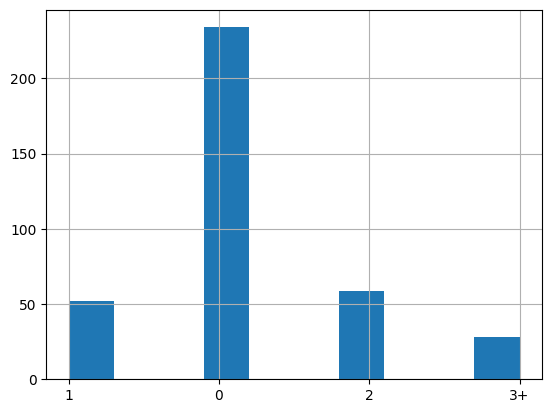

In [14]:
data["Dependents"].hist()

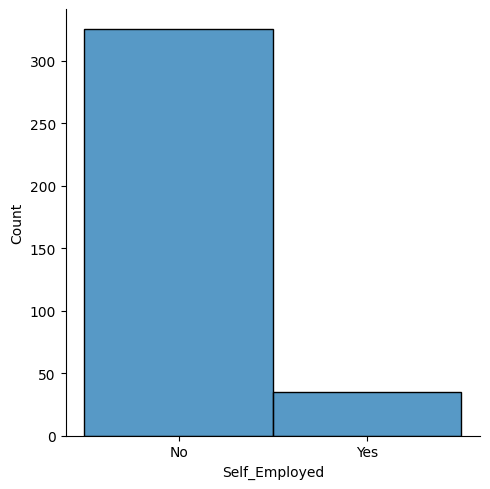

In [15]:
#explore variables
sns.displot(data['Self_Employed'])

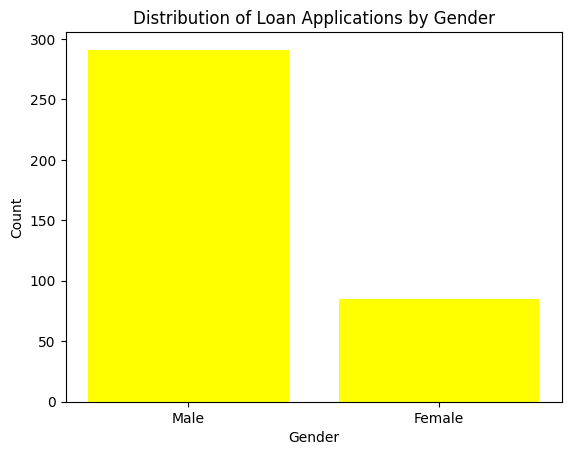

In [16]:
gender_counts = data['Gender'].value_counts() #used .value_counts() to get count of each gender
# Create the bar graph
plt.bar(gender_counts.index, gender_counts.values, color="Yellow")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Loan Applications by Gender")
plt.show()

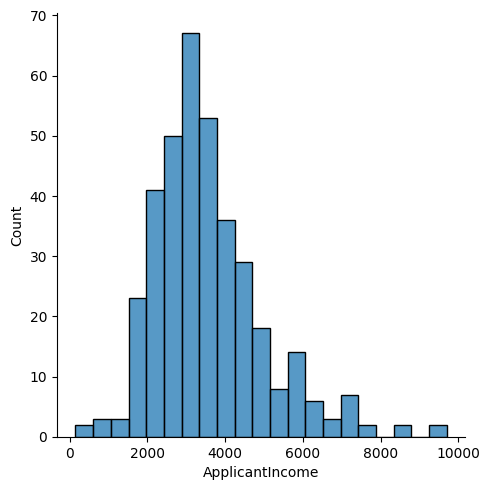

In [17]:
sns.displot(data['ApplicantIncome'])

<Axes: >

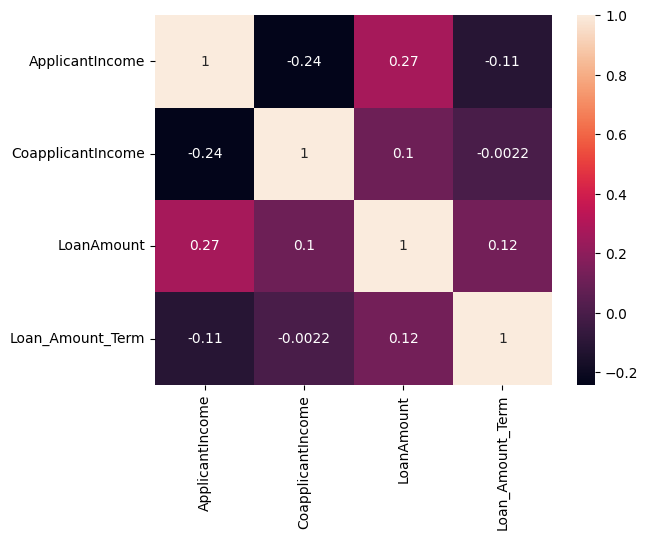

In [18]:
#heatmap creation
corr = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].corr()
sns.heatmap(corr,annot=True)

# **Data Preprocessing**

* **Cleaning**

In [19]:
#Take unique values
data['Loan_ID'].unique()

array(['LP001003', 'LP001005', 'LP001006', 'LP001008', 'LP001013',
       'LP001024', 'LP001027', 'LP001029', 'LP001030', 'LP001032',
       'LP001034', 'LP001036', 'LP001038', 'LP001041', 'LP001043',
       'LP001047', 'LP001050', 'LP001068', 'LP001073', 'LP001086',
       'LP001087', 'LP001095', 'LP001097', 'LP001098', 'LP001109',
       'LP001112', 'LP001116', 'LP001119', 'LP001120', 'LP001123',
       'LP001131', 'LP001136', 'LP001137', 'LP001138', 'LP001144',
       'LP001146', 'LP001151', 'LP001155', 'LP001157', 'LP001164',
       'LP001179', 'LP001194', 'LP001195', 'LP001197', 'LP001199',
       'LP001205', 'LP001206', 'LP001222', 'LP001228', 'LP001238',
       'LP001241', 'LP001245', 'LP001248', 'LP001250', 'LP001255',
       'LP001259', 'LP001264', 'LP001265', 'LP001275', 'LP001279',
       'LP001280', 'LP001282', 'LP001316', 'LP001319', 'LP001322',
       'LP001325', 'LP001327', 'LP001333', 'LP001334', 'LP001343',
       'LP001345', 'LP001367', 'LP001370', 'LP001384', 'LP0013

In [20]:
#check null values
data.duplicated().sum()

0

In [21]:
#get categorical columns
categorical = data.dtypes[data.dtypes == "object"].index
print(categorical)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [22]:
#Take summary of  the categorical columns
data[categorical].describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,381,376,381,373,375,360,381,381
unique,381,2,2,4,2,2,3,2
top,LP001003,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,291,228,234,274,325,149,271


In [23]:
#remove a Loan_ID coulmn
del data["Loan_ID"]


### *Check missing Values*

In [24]:
#check missing values
data.isnull().sum()

Unnamed: 0            0
Gender                5
Married               0
Dependents            8
Education             6
Self_Employed        21
ApplicantIncome      12
CoapplicantIncome    18
LoanAmount            8
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
#clean and fill the missing values
#ApplicantIncome
data["ApplicantIncome"].describe()

count     369.000000
mean     3563.422764
std      1427.371257
min       150.000000
25%      2583.000000
50%      3326.000000
75%      4226.000000
max      9703.000000
Name: ApplicantIncome, dtype: float64

In [26]:
#remove meissing values
#data = data.dropna()

In [27]:
data["ApplicantIncome"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
376    False
377    False
378    False
379    False
380    False
Name: ApplicantIncome, Length: 381, dtype: bool

In [28]:
#get the sum of Sum
data["ApplicantIncome"].isnull().sum()

12

In [29]:
#missing value indexes
missing_value = np.where((data)["ApplicantIncome"].isnull()== True)
missing_value

(array([ 50, 169, 207, 220, 241, 245, 302, 309, 328, 336, 337, 370],
       dtype=int64),)

In [30]:
#take the mean
mean = round((data)["ApplicantIncome"].mean(),0)
mean

3563.0

In [31]:
#take the median
median = round((data)["ApplicantIncome"].median(),0)
median

3326.0

In [32]:
#Fill missing values with mean
data["ApplicantIncome"].fillna(mean, inplace=True)
data["ApplicantIncome"].isnull().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15140\1662907227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["ApplicantIncome"].fillna(mean, inplace=True)


0

<Axes: >

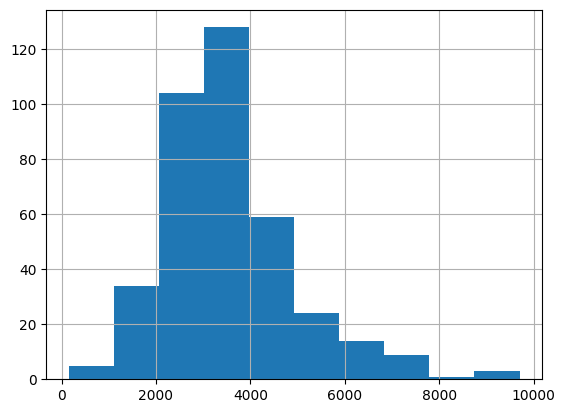

In [33]:
#get an idea about AppicantIncome
data["ApplicantIncome"].hist()

In [34]:
#CoapplicantIncome
missing_values = np.where((data)["CoapplicantIncome"].isnull()==True)
missing_values

(array([ 35,  43, 155, 193, 205, 232, 246, 261, 274, 286, 288, 339, 343,
        344, 351, 352, 367, 377], dtype=int64),)

In [35]:
#get mean
mean = round((data)["CoapplicantIncome"].mean(),0)
mean

1267.0

In [36]:
#check the missing values
data["CoapplicantIncome"].isnull().sum()

18

In [37]:
#get median
median = round((data)["CoapplicantIncome"].median(),0)
median

830.0

In [38]:
#Fill missing values with mean
data["CoapplicantIncome"].fillna(mean,inplace=True)
data["CoapplicantIncome"].isnull().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15140\4035461994.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["CoapplicantIncome"].fillna(mean,inplace=True)


0

<Axes: >

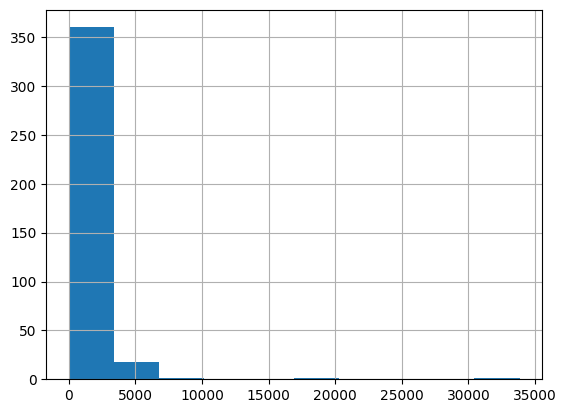

In [39]:
data["CoapplicantIncome"].hist()

In [40]:
#LoanAmount
missing_values = np.where((data)["LoanAmount"].isnull()==True)
missing_values

(array([ 18,  26,  80,  82, 244, 335, 354, 361], dtype=int64),)

In [41]:
#get mean
mean= round((data)["LoanAmount"].mean(),0)
mean

105.0

In [42]:
#get median
median= round((data)["LoanAmount"].median(),0)
median

110.0

In [43]:
#Fill missing values with mean
data["LoanAmount"].fillna(mean,inplace=True)
data["LoanAmount"].isnull().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15140\3721804286.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["LoanAmount"].fillna(mean,inplace=True)


0

<Axes: >

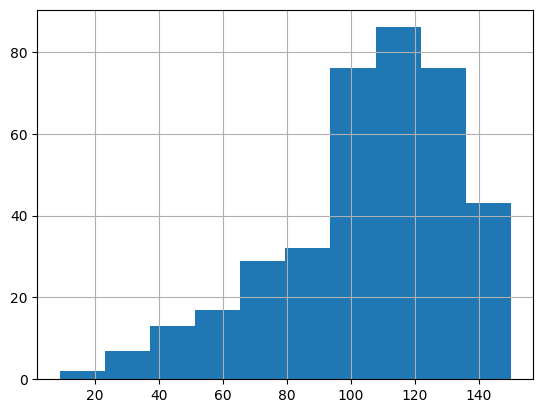

In [44]:
data["LoanAmount"].hist()

In [45]:
#Loan_Amount_Term
missing_values = np.where((data)["Loan_Amount_Term"].isnull()==True)
missing_values

(array([ 13,  24,  31,  32,  53, 118, 143, 213, 231, 267, 269], dtype=int64),)

In [46]:
#get mean
mean= round((data)["Loan_Amount_Term"].mean(),0)
mean

341.0

In [47]:
#get median
median= round((data)["Loan_Amount_Term"].median(),0)
median

360.0

In [48]:
#Fill missing values with mean
data["Loan_Amount_Term"].fillna(mean,inplace=True)
data["Loan_Amount_Term"].isnull().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15140\1198976073.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Loan_Amount_Term"].fillna(mean,inplace=True)


0

<Axes: >

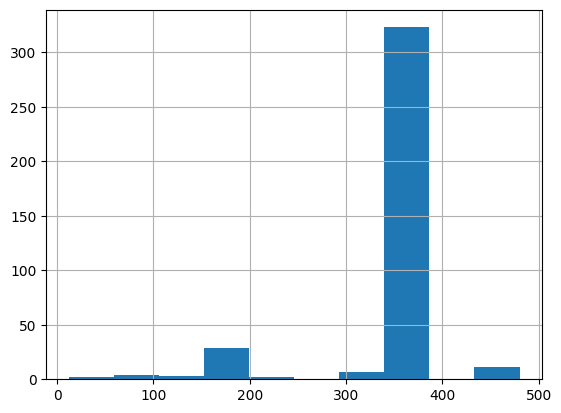

In [49]:
data["Loan_Amount_Term"].hist()

In [50]:
#Credit_History
#Loan_Amount_Term
missing_values = np.where((data)["Credit_History"].isnull()==True)
missing_values

(array([ 10,  29,  56,  60,  77,  81, 110, 114, 119, 135, 145, 161, 174,
        199, 202, 203, 206, 227, 236, 246, 249, 287, 303, 310, 315, 319,
        344, 351, 354, 366], dtype=int64),)

In [51]:
mean= round((data)["Credit_History"].mean(),0)
mean

1.0

In [52]:
median = round((data)["Credit_History"].mean(),0)
median

1.0

In [53]:
data["Credit_History"].fillna(mean,inplace= True)
data["Credit_History"].isnull().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15140\238152939.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Credit_History"].fillna(mean,inplace= True)


0

<Axes: >

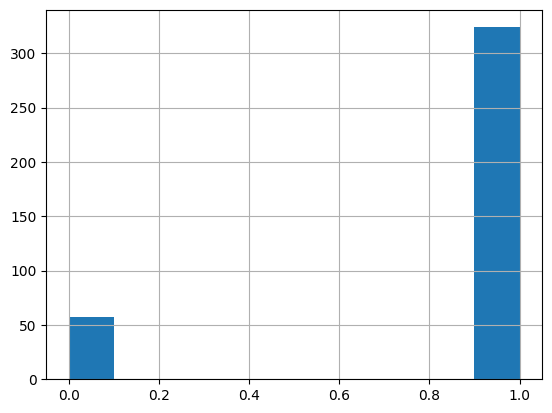

In [54]:
data["Credit_History"].hist()

### *Transformation*

In [55]:
#conside Credit_History with 0 or 1
new_Credit_History = pd.Categorical(data["Credit_History"])
new_Credit_History = new_Credit_History.rename_categories(["Yes", "No"])
new_Credit_History.describe()

,counts,freqs
categories,,
Yes,57,0.149606
No,324,0.850394


In [56]:
data["Credit_History"].describe()

count    381.000000
mean       0.850394
std        0.357154
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [57]:
#data = data.dropna(subset=["Dependents"])

In [58]:
#conside Gender with 0 , 1 ,2,3+
new_Gender = pd.Categorical(data["Dependents"]) #dropna is method of pands is used to remove missing values
new_Gender =new_Gender.rename_categories(["0", "1", "2", "3+",])
new_Gender.describe()

,counts,freqs
categories,,
0,234,0.614173
1,52,0.136483
2,59,0.154856
3+,28,0.073491
NaN,8,0.020997


### *Feature Selection*

### *Variance*

# **Data Mining**

##**K-mean**

In [59]:
#take neccesary columns
data = data[['ApplicantIncome','LoanAmount']]
data

,ApplicantIncome,LoanAmount
0,4583.0,128.0
1,3000.0,66.0
2,2583.0,120.0
3,6000.0,141.0
4,2333.0,95.0
...,...,...
376,5703.0,128.0
377,3232.0,108.0
378,2900.0,71.0
379,4106.0,40.0


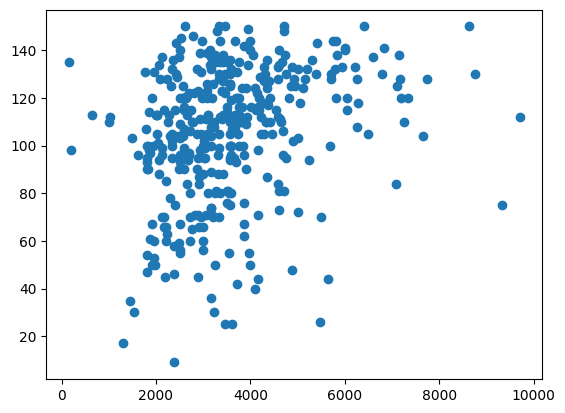

In [75]:
plt.scatter(data['ApplicantIncome'],data['LoanAmount'])

In [76]:
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5]
WCSS =[]
#to check the k_values one by one
for k in k_values:
  model = KMeans(n_clusters=k)
  model.fit(data[['ApplicantIncome','LoanAmount']])
  WCSS.append (model.inertia_)

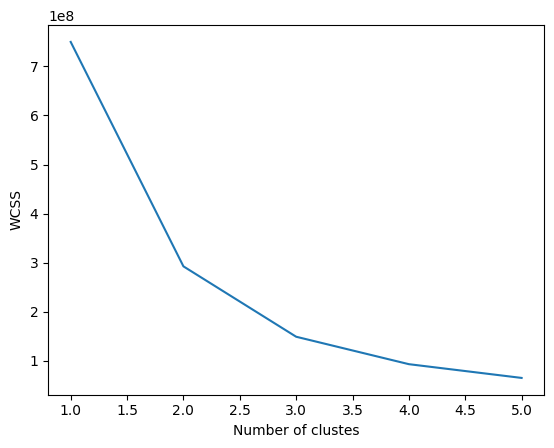

In [77]:
#get elbow method
plt.xlabel("Number of clustes")
plt.ylabel("WCSS")
plt.plot(k_values,WCSS)

In [78]:
model = KMeans(n_clusters=3)
pred = model.fit_predict(data)
pred

array([2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2,
       0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 1,
       1, 0, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 1, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2,

In [79]:
#add clusters column
data['clusters'] = pred
data.head(5)

,ApplicantIncome,LoanAmount,clusters
0,4583.0,128.0,2
1,3000.0,66.0,0
2,2583.0,120.0,0
3,6000.0,141.0,1
4,2333.0,95.0,0


In [80]:
#get all the clusters
c1=data[data['clusters']==0]
c2=data[data['clusters']==1]
c3=data[data['clusters']==2]


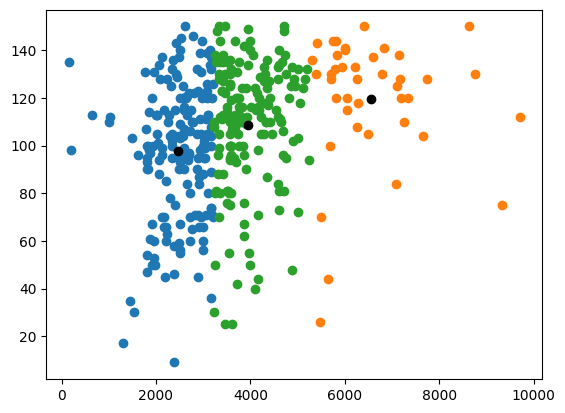

In [66]:
#all the clusters with center points
plt.scatter(c1["ApplicantIncome"],c1["LoanAmount"])
plt.scatter(c2["ApplicantIncome"],c2["LoanAmount"])
plt.scatter(c3["ApplicantIncome"],c3["LoanAmount"])

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color = "black")

## **Hierarchical clustering**

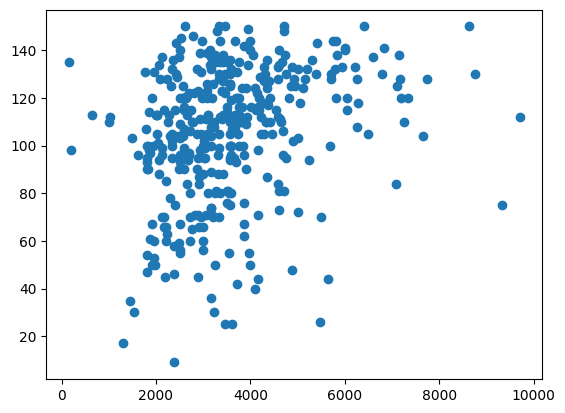

In [67]:
plt.scatter(data['ApplicantIncome'],data['LoanAmount'])
#plt.scatter(data['ApplicantIncome'],data['LoanAmount'])

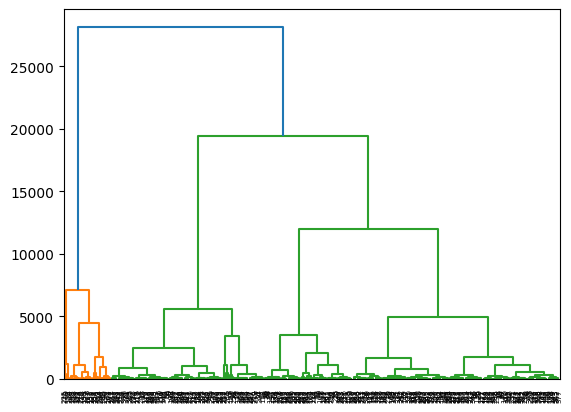

In [68]:
#represent in dendogram
import scipy.cluster.hierarchy as sc
#plt.figure(figsize=(50,40))
dendogram = sc.dendrogram(sc.linkage(data[['ApplicantIncome','LoanAmount']],method="ward"))

In [69]:
#train a model to predict distence
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
pred = model.fit_predict(data[['ApplicantIncome','LoanAmount']])

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [ ]:
#prediction
pred

array([0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1,
       1, 0, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0,

In [ ]:
#take neccesary columns
data = data[['ApplicantIncome','LoanAmount']]
data

,ApplicantIncome,LoanAmount
0,4583.0,128.0
1,3000.0,66.0
2,2583.0,120.0
3,6000.0,141.0
4,2333.0,95.0
...,...,...
376,5703.0,128.0
377,3232.0,108.0
378,2900.0,71.0
379,4106.0,40.0


In [ ]:
#Create clusters column
data['clusters']=pred
data
#del data['clusters']

,ApplicantIncome,LoanAmount,clusters
0,4583.0,128.0,0
1,3000.0,66.0,0
2,2583.0,120.0,2
3,6000.0,141.0,1
4,2333.0,95.0,2
...,...,...,...
376,5703.0,128.0,1
377,3232.0,108.0,0
378,2900.0,71.0,0
379,4106.0,40.0,0


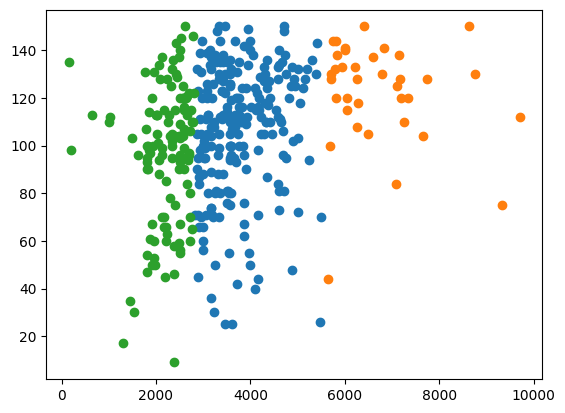

In [ ]:
cluster1 = data[data["clusters"]==0]
cluster2 = data[data["clusters"]==1]
cluster3 = data[data["clusters"]==2]

plt.scatter(cluster1['ApplicantIncome'], cluster1['LoanAmount'])
plt.scatter(cluster2['ApplicantIncome'], cluster2['LoanAmount'])
plt.scatter(cluster3['ApplicantIncome'], cluster3['LoanAmount'])